### Create Graphs

In [68]:
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Train_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

In [76]:
def get_mean(logdir):
    eventfile = glob.glob(logdir)
    Ys = []
    for e in eventfile:
        X, Y = get_section_results(e)
        if len(Y) == 49: #deal with some half-runs
            Ys.append(Y)
            x = X
    y_bar = np.mean(Ys, axis=0)
    return y_bar, x

y1_bar, _ = get_mean('../data/hw3_q2_dqn*/events*')
y2_bar, x = get_mean('../data/hw3_q2_double*/events*')

Text(0,0.5,'Average Eval Reward')

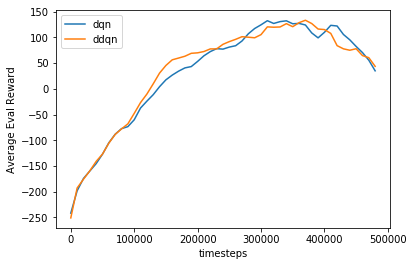

In [77]:
plt.plot(x[:len(y1_bar)], y1_bar, label="dqn")
plt.plot(x[:len(y2_bar)], y2_bar, label="ddqn")
plt.legend()
plt.xlabel("timesteps")
plt.ylabel("Average Eval Reward")

Text(0,0.5,'Average Eval Reward')

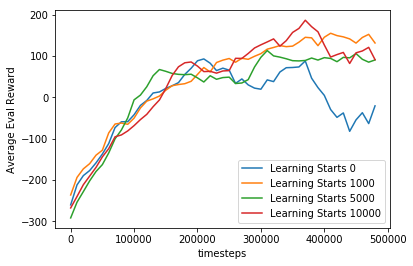

In [81]:
e = glob.glob("../data/hw3_q3_hparam1*/events*")[0]
X, Y = get_section_results(e)
plt.plot(X[:len(Y)], Y, label="Learning Starts 0")

e = glob.glob("../data/hw3_q2_dqn_1*/events*")[0]
X, Y = get_section_results(e)
plt.plot(X[:len(Y)], Y, label="Learning Starts 1000")

e = glob.glob("../data/hw3_q3_hparam2*/events*")[0]
X, Y = get_section_results(e)
plt.plot(X[:len(Y)], Y, label="Learning Starts 5000")

e = glob.glob("../data/hw3_q3_hparam3*/events*")[0]
X, Y = get_section_results(e)
plt.plot(X[:len(Y)], Y, label="Learning Starts 10000")

plt.legend()
plt.xlabel("timesteps")
plt.ylabel("Average Eval Reward")
    
